Source:
https://www.youtube.com/watch?v=ZB7BZMhfPgk
<br>NDArray attributes and methods
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

In [1]:
# world without Numpy
a = [1,2,3,4]
b= [4,5,6,7]
a+b

[1, 2, 3, 4, 4, 5, 6, 7]

In [2]:
res = []
for first,second in zip(a,b):
    res.append(first+second)
print(res)

[5, 7, 9, 11]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [4]:
a = np.array([1,2,3,4])

In [5]:
a.dtype

dtype('int64')

In [6]:
a.ndim

1

In [7]:
a.shape

(4,)

In [8]:
a.size

4

In [9]:
#universal func ufunc
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

### Indexing and slicing

In [10]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

In [12]:
#get last three items
a[-3:]

array([ 8,  9, 10])

In [13]:
#grab first three elements
a[:3]

array([1, 2, 3])

In [14]:
a = np.arange(25).reshape(5,5)

In [15]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [16]:
a[:,1::2]

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [18]:
a[1::2,0:4:2]

array([[ 5,  7],
       [15, 17]])

In [19]:
a[4]

array([20, 21, 22, 23, 24])

In [21]:
img = plt.imread('dc_metro.png')

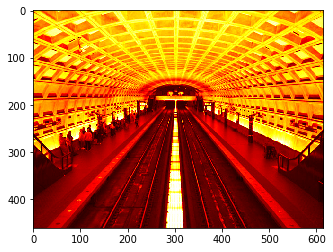

In [25]:
plt.imshow(img,cmap=plt.cm.hot)

In [26]:
def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

In [27]:
avg_img = smooth(img)

Text(0.5, 1.0, 'smoothed once')

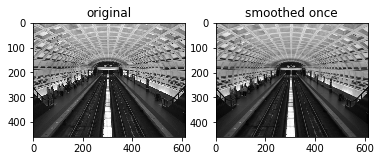

In [33]:
plt.figure()
# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed once')



Text(0.5, 1.0, 'difference')

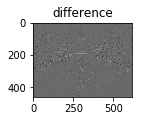

In [34]:
# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')

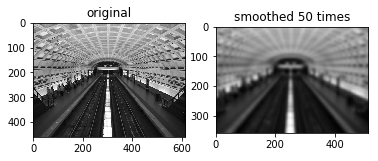

In [35]:
# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

In [40]:
%timeit smooth(img)

820 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit smooth_loop(img)

757 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Fancy Indexing

In [46]:
a = np.arange(0,80,10)

In [47]:
a

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [49]:
indices = [1,2,-3]

In [50]:
a[indices]

array([10, 20, 50])

In [51]:
a[indices]=99

In [52]:
a

array([ 0, 99, 99, 30, 40, 99, 60, 70])

Indexing with booleans

In [53]:
b = np.array([-1,-2,-3,0,1,2,3,4])

In [54]:
negatives = b<0
negatives

array([ True,  True,  True, False, False, False, False, False])

In [55]:
b[negatives]

array([-1, -2, -3])

In [56]:
b[negatives]=0
b

array([0, 0, 0, 0, 1, 2, 3, 4])

Exercise
1. Extract numbers 
2. Select all whic are divisble by 3

In [57]:
a = np.arange(25).reshape(5,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [59]:
a[[0,2,3],1:]

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [16, 17, 18, 19]])

In [61]:
a[[0],[2]]

array([2])

In [63]:
a[[0,2,3,3],[2,3,1,4]]

array([ 2, 13, 16, 19])

In [60]:
#2.

a[a%3==0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

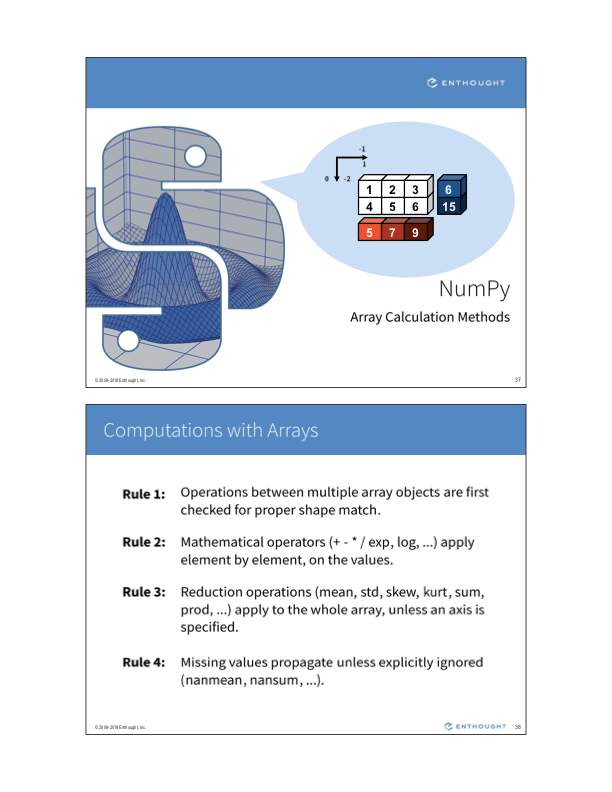                                                        

In [74]:
#Rule 1
a = np.arange(5).reshape(5,1)
a.shape

(5, 1)

In [72]:
b = np.arange(3).reshape(1,3)
b.shape

(1, 3)

In [76]:
c=a+b
c

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [75]:
#Rule 3

In [77]:
np.sum(c,axis=0)

array([10, 15, 20])

In [80]:
np.sum(c,axis=1)

array([ 3,  6,  9, 12, 15])

In [83]:
c.sum(axis=0)

array([10, 15, 20])

#### Mathematical functions
1. Sum, Prod
2. min, max, argmin, argmax
3. ptp (max-min)

#### Stats
1. Mean, std, var

#### Truth value testing
1. Any, All

In [89]:
a = np.array([1,2,3,4,5,6,6])

In [91]:
#returns indices
np.where(a>3)

(array([3, 4, 5, 6]),)

In [104]:
a = np.array([[5,6],[2,3],[8,7]])
a

array([[5, 6],
       [2, 3],
       [8, 7]])

In [105]:
a.max()

8

In [111]:
#This will consider 2d array as 1D
a.argmax()

4

In [109]:
#This will show th correct location
np.unravel_index(a.argmax(),a.shape)

(2, 0)

### Excercice

"""
Wind Statistics
----------------
Topics: Using array methods over different axes, fancy indexing.
1. The data in 'wind.data' has the following format::
        61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71
   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.
   Use the 'loadtxt' function from numpy to read the data into
   an array.
2. Calculate the min, max and mean windspeeds and standard deviation of the
   windspeeds over all the locations and all the times (a single set of numbers
   for the entire dataset).
3. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)
4. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)
5. Find the location which has the greatest windspeed on each day (an integer
   column number for each day).
6. Find the year, month and day on which the greatest windspeed was recorded.
7. Find the average windspeed in January for each location.
You should be able to perform all of these operations without using a for
loop or other looping construct.
<br><br>Bonus
~~~~~
1. Calculate the mean windspeed for each month in the dataset.  Treat
   January 1961 and January 1962 as *different* months.
2. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds across all locations for each week (assume that the first week
   starts on January 1 1961) for the first 52 weeks.
<br><br>Bonus Bonus
~~~~~~~~~~~
Calculate the mean windspeed for each month without using a for loop.
(Hint: look at `searchsorted` and `add.reduceat`.)

In [3]:
wind_data = np.loadtxt('wind.data')

In [5]:
wind_data[:10]

array([[61.  ,  1.  ,  1.  , 15.04, 14.96, 13.17,  9.29, 13.96,  9.87,
        13.67, 10.25, 10.83, 12.58, 18.5 , 15.04],
       [61.  ,  1.  ,  2.  , 14.71, 16.88, 10.83,  6.5 , 12.62,  7.67,
        11.5 , 10.04,  9.79,  9.67, 17.54, 13.83],
       [61.  ,  1.  ,  3.  , 18.5 , 16.88, 12.33, 10.13, 11.17,  6.17,
        11.25,  8.04,  8.5 ,  7.67, 12.75, 12.71],
       [61.  ,  1.  ,  4.  , 10.58,  6.63, 11.75,  4.58,  4.54,  2.88,
         8.63,  1.79,  5.83,  5.88,  5.46, 10.88],
       [61.  ,  1.  ,  5.  , 13.33, 13.25, 11.42,  6.17, 10.71,  8.21,
        11.92,  6.54, 10.92, 10.34, 12.92, 11.83],
       [61.  ,  1.  ,  6.  , 13.21,  8.12,  9.96,  6.67,  5.37,  4.5 ,
        10.67,  4.42,  7.17,  7.5 ,  8.12, 13.17],
       [61.  ,  1.  ,  7.  , 13.5 , 14.29,  9.5 ,  4.96, 12.29,  8.33,
         9.17,  9.29,  7.58,  7.96, 13.96, 13.79],
       [61.  ,  1.  ,  8.  , 10.96,  9.75,  7.62,  5.91,  9.62,  7.29,
        14.29,  7.62,  9.25, 10.46, 16.62, 16.46],
       [61.  ,  1.  ,  9

In [12]:
#2.
print(f'Mean {np.mean(wind_data[:,3:]):.2f}')
print(f'Max {np.max(wind_data[:,3:])}')
print(f'Min {np.min(wind_data[:,3:])}')
print(f'STD Dev{np.std(wind_data[:,3:])}')


Mean 10.23
Max 42.54
Min 0.0
STD Dev5.603840181095793


In [15]:
#3
print(f'Mean {np.mean(wind_data[:,3:],axis=0)}')
print(f'Max {np.max(wind_data[:,3:],axis=0)}')
print(f'Min {np.min(wind_data[:,3:],axis=0)}')
print(f'STD Dev{np.std(wind_data[:,3:],axis=0)}')

Mean [12.36371463 10.64644813 11.66010344  6.30627472 10.45688013  7.09225434
  9.7968345   8.49442044  8.49581838  8.70726803 13.121007   15.59946152]
Max [35.8  33.37 33.84 28.46 37.54 26.16 30.37 31.08 25.88 28.21 42.38 42.54]
Min [0.67 0.21 1.5  0.   0.13 0.   0.   0.   0.   0.04 0.13 0.67]
STD Dev[5.61918301 5.26820081 5.00738377 3.60513309 4.93536333 3.96838126
 4.97689374 4.49865783 4.16746101 4.50327222 5.83459319 6.69734719]


In [14]:
np.mean(wind_data[:,3:],axis=0)

array([12.36371463, 10.64644813, 11.66010344,  6.30627472, 10.45688013,
        7.09225434,  9.7968345 ,  8.49442044,  8.49581838,  8.70726803,
       13.121007  , 15.59946152])

In [24]:
#4
print(f'Mean {np.mean(wind_data[:,3:],axis=1)}')

Mean [13.09666667 11.79833333 11.34166667 ... 14.89       15.3675
 15.4025    ]


In [28]:
#5 Find the location which has the greatest windspeed on each day (an integer column number for each day).

np.argmax(wind_data[:,3:],axis=1)


array([10, 10,  0, ..., 11, 11,  2])

In [44]:
#6 Find the year, month and day on which the greatest windspeed was recorded.
data = wind_data[:,3:]
dates=wind_data[:,:3]

#Ans 1
np.where(data==data.max())
#Ans 2
np.unravel_index(data.argmax(),data.shape) 
#Ans 3
max_id = data.max(axis=1).argmax()

dates[max_id]

array([66., 12.,  2.])

In [47]:
#7 Find the average windspeed in January for each location. 
#You should be able to perform all of these operations without using a for loop or other looping construct. 

In [63]:
jan=dates[:,1]==1

In [65]:
data[jan].mean(axis=0)

array([14.86955197, 12.92166667, 13.29962366,  7.19949821, 11.67571685,
        8.05483871, 11.81935484,  9.5094086 ,  9.54320789, 10.05356631,
       14.55051971, 18.02876344])

#### Strides link memory representation to python shape

Operations that only afect the structure and not the dat can usually be executed without copying the memory

In [85]:
a=np.arange(24,dtype='int16').reshape(3,8)

In [86]:
a.shape

(3, 8)

In [93]:
a.shape=(8,3)

In [94]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]], dtype=int16)

In [95]:
a.strides=(2,16)

In [96]:
a

array([[ 0,  8, 16],
       [ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23]], dtype=int16)

### Flattening the arrays

In [97]:
# np.flatten() returns a copy while np.ravel() returns view

In [98]:
a = np.array([[0,1],[1,2]])

In [100]:
b=a.flatten()

In [101]:
b.base == a

array([[False, False],
       [False, False]])

In [103]:
b.data == a.data

False

In [111]:
a = np.array([[0,1],[1,2]])

In [115]:
b=np.ravel(a)
b

array([0, 1, 1, 2])

In [117]:
b[0]=100
a

array([[100,   1],
       [  1,   2]])

In [113]:
b.base==a.base

array([[False, False],
       [False, False]])

In [114]:
b.data==a.data

False

In [119]:
b.data,a.data

(<memory at 0x1139464c8>, <memory at 0x113f3f630>)